In [1]:
import os
import time
import utils
import torch
from datasets.kitti import KITTIdataset
import torchvision
from utils import *
from torch.nn import BCELoss
from torch.autograd import grad
import torchvision.utils as tvls
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import DataLoader
from models.gan import Generator
from models.gan import Discriminator
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from torchvision.utils import save_image
from tqdm.notebook import tqdm
from models.deeplabv3 import DeepLabV3
from utils.parse import colorize_mask

KeyboardInterrupt: 

---------------------Infrance GAN------------------------------


d:\Anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
d:\Anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


torch.Size([1, 3, 128, 256])


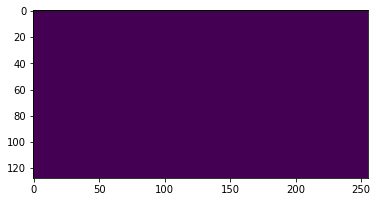

[13]


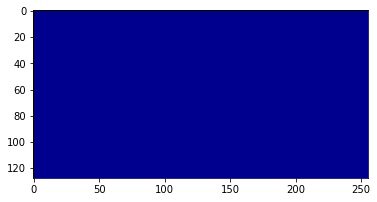

In [ ]:

from tabnanny import check


def freeze(net):
    for p in net.parameters():
        p.requires_grad_(False) 

def unfreeze(net):
    for p in net.parameters():
        p.requires_grad_(True)

run_time = time.strftime("%Y-%m-%d_%H-%M-%S",time.localtime())
save_img_dir = f"gan_result/{run_time}/imgs_kitti_gan"

# os.makedirs(save_img_dir, exist_ok=True)

dataset_name = "kitti"




if __name__ == "__main__":
    ###
    # hyper params and settings
    ###
    def main():
        lr = 2e-4
        batch_size = 4
        z_dim = 512
        epochs = 20
        n_critic = 5

        print(f"---------------------Infrance {'GAN'}------------------------------")
        
        T = DeepLabV3().cuda().eval()
        checkpoint = torch.load(r"F:\COMP90055\GMIDA\train-runs\2022-09-22_22-44-38\checkpoint\deeplabv3-30.pth")
        T.load_state_dict(checkpoint)
        freeze(T)
        G = Generator(z_dim)
        G = torch.nn.DataParallel(G).cuda()
        freeze(G)
        checkpoint = torch.load(r"F:\COMP90055\GMIDA\gan_result\2022-09-25_03-38-05\models_kitti_gan\kitti_5_G.pth")
        G.load_state_dict(checkpoint)
        G.eval()
        start = time.time()
        last_z = None
        for i in range(1):
            z = torch.randn(1, z_dim).cuda()*0
            f_imgs = G(z)
            f_imgs = torch.zeros(1,3,128,256).cuda()
            print(f_imgs.size())
            plt.imshow(f_imgs[0].data.max(0)[1].cpu().numpy())
            plt.show()

            output = T(f_imgs)['out']
            print(np.unique(output[0].data.max(0)[1].cpu().numpy()))
            output = colorize_mask(output[0].data.max(0)[1].cpu().numpy())
            plt.imshow(output)
            plt.show()
            last_z = z

main()